In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("C:/Users/Akash/train_lp.csv")

In [3]:
test=pd.read_csv("C:/Users/Akash/test_lp.csv")

In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
len(train.columns)

13

In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Here we can observe that the maximum value of ApplicantIncome and CoapplicantIncome is much higher than the 75%of the data of ApplicantIncome and CoapplicantIncome, respectively.

In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


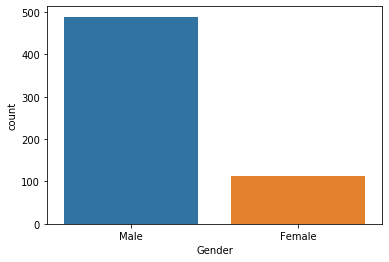

In [11]:
sns.countplot(train.Gender)

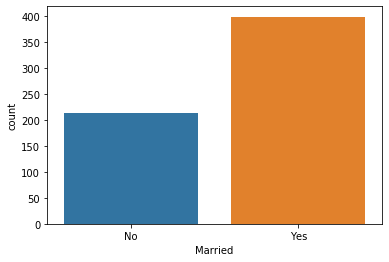

In [12]:
sns.countplot(train.Married)

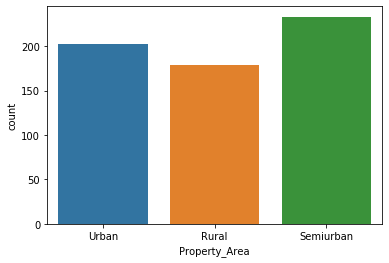

In [13]:
sns.countplot(x="Property_Area",data=train)

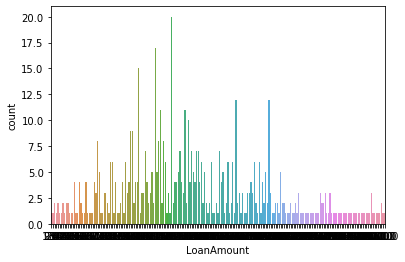

In [14]:
sns.countplot(train.LoanAmount)

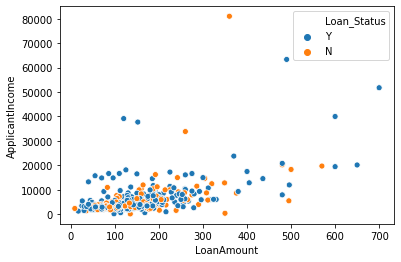

In [15]:
sns.scatterplot(x=train['LoanAmount'],y=train['ApplicantIncome'], hue =train['Loan_Status']) 

### There are many outliers in the data as observed from the scatter plot, but we can observe Applicant Income has a moderate effect on Loan Amount

# Exploratory Analysis

In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
#Label Encoding the categorical columns
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [22]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)            # Loan Amount and loan _amount_term are continuous variables and taking mean/mode for such varibles may not be a good idea, as it can affect outliers.
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

In [23]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [25]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)            # Loan Amount and loan _amount_term are continuous variables and taking mean/mode for such varibles may not be a good idea, as it can affect outliers.
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [26]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
train=train.drop("Loan_ID", axis=1)

In [28]:
test_ID=test['Loan_ID'] 

In [29]:
test.drop('Loan_ID', axis = 1, inplace = True)

In [30]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


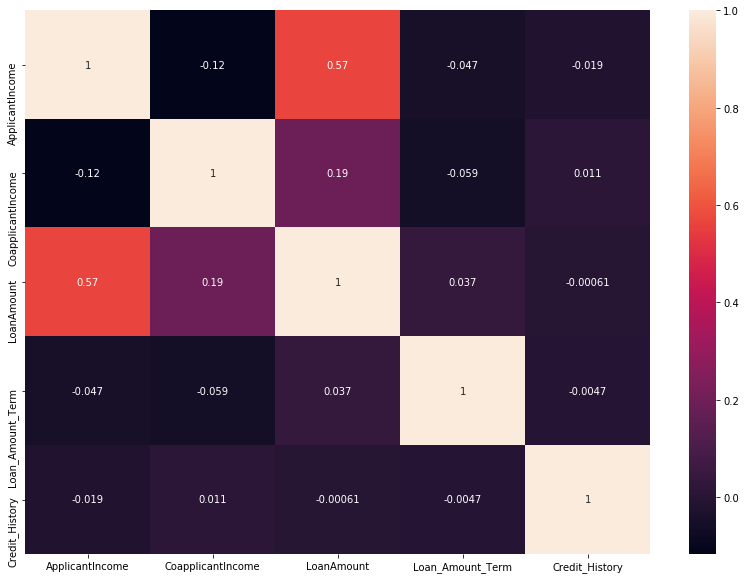

In [31]:
plt.figure(figsize = (14, 10))
sns.heatmap(train.corr(), annot = True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le_Gender= LabelEncoder()
le_Married = LabelEncoder()
le_Education = LabelEncoder()
le_Self_Employed = LabelEncoder()
le_Property_Area = LabelEncoder()
le_Loan_Status = LabelEncoder()

In [33]:
train['gender']=le_Gender.fit_transform(train['Gender'])
train['married']=le_Married.fit_transform(train['Married'])
train['education']=le_Education.fit_transform(train['Education'])
train['self_employed']=le_Self_Employed.fit_transform(train['Self_Employed'])
train['property_area']=le_Property_Area.fit_transform(train['Property_Area'])
train['loan_status']=le_Loan_Status.fit_transform(train['Loan_Status'])


In [34]:
train=train.drop(["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status'], axis=1)


In [35]:
from sklearn.preprocessing import LabelEncoder
len_Gender= LabelEncoder()
len_Married = LabelEncoder()
len_Education = LabelEncoder()
len_Self_Employed = LabelEncoder()
len_Property_Area = LabelEncoder()
len_Loan_Status = LabelEncoder()

In [36]:
test['gender']=len_Gender.fit_transform(test['Gender'])
test['married']=len_Married.fit_transform(test['Married'])
test['education']=len_Education.fit_transform(test['Education'])
test['self_employed']=len_Self_Employed.fit_transform(test['Self_Employed'])
test['property_area']=len_Property_Area.fit_transform(test['Property_Area'])

In [37]:
test=test.drop(["Gender",'Married','Education','Self_Employed','Property_Area'], axis=1)

In [38]:
test.Dependents=test.Dependents.str.replace('+','')  #dependents 3 or more can be considered in same group

In [39]:
test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender,married,education,self_employed,property_area
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,2
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,2
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,2
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,2
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,2
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,2
364,0,3250,1993,126.0,360.0,1.0,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0


In [40]:
train.Dependents=train.Dependents.str.replace('+','')

In [41]:
for i in train:
    print('skewness of',i,'is',train[i].skew())

skewness of Dependents is 1.015550985536672
skewness of ApplicantIncome is 6.539513113994625
skewness of CoapplicantIncome is 7.491531216657306
skewness of LoanAmount is 2.743052748820892
skewness of Loan_Amount_Term is -2.4021122563890396
skewness of Credit_History is -2.0219705924848985
skewness of gender is -1.6487952886687591
skewness of married is -0.6448502342244192
skewness of education is 1.367622010164177
skewness of self_employed is 2.159796196971883
skewness of property_area is -0.06619614490788747
skewness of loan_status is -0.8099980938586473


In [42]:
x=train.drop('loan_status',axis=1)

In [43]:
y=train.loan_status

In [44]:
y=pd.DataFrame(y)

In [45]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [42]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1=sc.fit_transform(x)
y1=sc.fit_transform(y)

In [46]:
from sklearn import preprocessing
from sklearn import utils

In [47]:
lab_enc = preprocessing.LabelEncoder()
y2 = lab_enc.fit_transform(y1)
print(y2)
print(utils.multiclass.type_of_target(y1))
print(utils.multiclass.type_of_target(y1.astype('int')))
print(utils.multiclass.type_of_target(y1))

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.3,random_state=0)

In [49]:
x_test.shape

(185, 11)

# Logistic Regression

In [50]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [81]:
pred_t=clf.predict(test)

In [52]:
len(y_pred)

185

In [52]:
from sklearn.metrics import accuracy_score
print('The accuracy of Logistic Regression is: ',accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.8324324324324325


In [53]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(clf, x_train,y_train,cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.8041958  0.77622378 0.81118881]
Mean cross-validation score (3-fold): 0.797


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 22,  29],
       [  2, 132]], dtype=int64)

# Support Vector Classifier

In [55]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
y_pred1=svc.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
print('The accuracy of SVC is: ',accuracy_score(y_pred1, y_test))

The accuracy of SVC is:  0.827027027027027


In [58]:
cv_scores1 = cross_val_score(svc, x_train,y_train,cv=3)
print('Cross-validation scores (3-fold):', cv_scores1)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores1)))

Cross-validation scores (3-fold): [0.81818182 0.78321678 0.8041958 ]
Mean cross-validation score (3-fold): 0.802


In [59]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[ 21,  30],
       [  2, 132]], dtype=int64)

In [60]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
cla= DecisionTreeClassifier(criterion ='entropy', random_state = 0)
cla.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [61]:
y_pred2 = cla.predict(x_test)
y_pred2

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
print('The accuracy of Decision Tree Classifier is: ',accuracy_score(y_pred2, y_test))

The accuracy of Decision Tree Classifier is:  0.6864864864864865


In [63]:
cv_scores2 = cross_val_score(cla, x_train,y_train,cv=3)
print('Cross-validation scores (3-fold):', cv_scores2)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores2)))

Cross-validation scores (3-fold): [0.70629371 0.65734266 0.72027972]
Mean cross-validation score (3-fold): 0.695


In [64]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[28, 23],
       [35, 99]], dtype=int64)

# Principal Component Analysis

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train1 = pca.fit_transform(x_train)
x_test1 = pca.fit_transform(x_test)


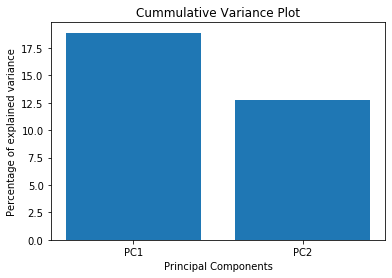

<Figure size 720x720 with 0 Axes>

In [66]:
var=np.round(pca.explained_variance_ratio_*100,decimals=2)
labels=['PC'+str(u) for u in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=labels)

plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Components")
plt.title('Cummulative Variance Plot')
plt.figure(figsize=(10,10))
plt.show()

# Results

# The accuracy of Logistic Regression is: 83.2%
# The accuracy of SVC is: 82.7%
# The accuracy of Decision Tree Classifier is: 68.6%

In [ ]:
# Thus the logistic regression turns out to be the best model for our analysis

In [83]:
result1 = []
for value in pred_t:
    if value == 1:
        result1.append('Y')
    else:
        result1.append('N')
df = pd.concat([test_ID, pd.DataFrame(result1)], axis = 1)
df.rename(columns = {0:'Loan_Status'}, inplace = True)
df.to_csv('Result_Logistic Reg.csv', index = False)

In [85]:
result2 = []
for value in pred_t:
    if value == 1:
        result2.append('Y')
    else:
        result2.append('N')
df1 = pd.concat([test_ID, pd.DataFrame(result2)], axis = 1)
df1.rename(columns = {0:'Loan_Status'}, inplace = True)
df1.to_csv('Result_SVC.csv', index = False)

In [86]:
result3= []
for value in pred_t:
    if value == 1:
        result3.append('Y')
    else:
        result3.append('N')
df2 = pd.concat([test_ID, pd.DataFrame(result3)], axis = 1)
df2.rename(columns = {0:'Loan_Status'}, inplace = True)
df2.to_csv('Result_Decision Tree.csv', index = False)